# Monte Carlo Simulation

Monte Carlo Simulation, also known as the Monte Carlo Method or a multiple probability simulation, is a mathematical technique, which is used to estimate the possible outcomes of an uncertain event. 

## Coin flip

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def coin_flip():
    return random.randint(0, 1)

In [3]:
def monte_carlo(n):
    values = []
    prob_values = []
    for i in range(0, n):
        values.append(coin_flip())
        p = sum(values) / (i+1)
        prob_values.append(p)
    probability = sum(prob_values) / n
    # Plot the values
    plt.figure(figsize=(9, 9))
    
    plt.subplot(211)
    plt.plot(values, lw=0.3, marker='.', ls='--')
    plt.ylabel('Values')
    # Plot the probabilities
    plt.subplot(212)
    plt.plot(prob_values)
    plt.axhline(y=0.5, color='red')
    
    plt.xlabel('Iterations')
    plt.ylabel('Probability')
    return probability

The probability is 0.5019670510424235


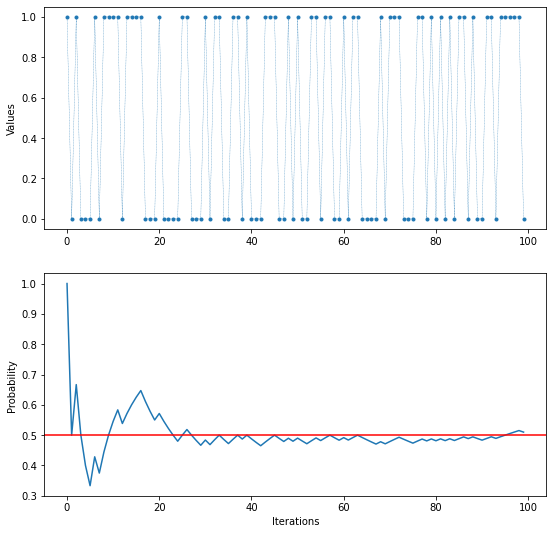

In [4]:
answer = monte_carlo(100)
print('The probability is', answer)

## Monty Hall Problem

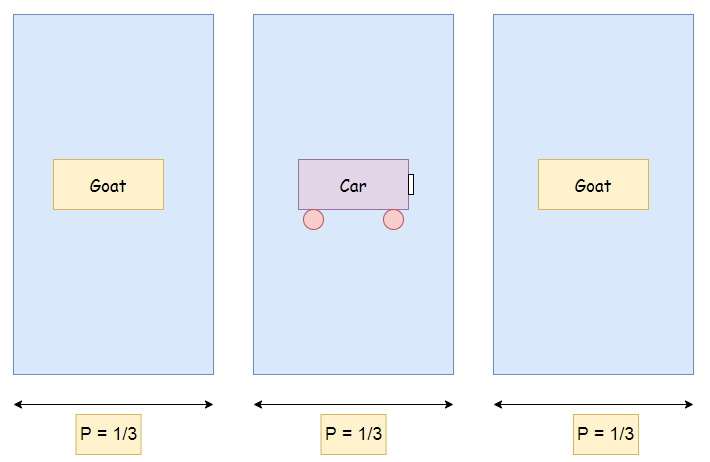

In [5]:
# We have 3 doors:
# 1 - Car
# 2 - Goats
doors = ['goat', 'car', 'goat']

def monte_carlo(n):
    # Empty lists to store probabiltiy values
    prob_switch_win = []
    prob_stick_win = []
    # Calculate switch and stick wins:
    switch_wins = 0
    stick_wins = 0
    for i in range(0, n):
        # Randomly place car and goat behind the doors
        random.shuffle(doors)
        # Contestant choice after he opened the first door and it is a goat
        choice = random.randrange(2)
        # The car is not behind the first chosen door (contestant would have won swithching)
        if doors[choice] != 'car':
            switch_wins += 1
        # The car is behind the first chosen door (contestant would have won sticking)
        else:
            stick_wins += 1
        
        # Calculate the probabilities
        prob_stick = stick_wins / (i+1)
        prob_switch = switch_wins / (i+1)
        
        prob_stick_win.append(prob_stick)
        prob_switch_win.append(prob_switch)
        
    # Plot the probabilities
    plt.axhline(y=0.3333, color='g')
    plt.axhline(y=0.6666, color='red')
    plt.plot(prob_switch_win, label='switch')
    plt.plot(prob_stick_win, label='stick')
    plt.legend()
    
    print('Winning probability if you always switch:', prob_switch)
    print('Winning probability if you always stick to your original choice:', prob_stick)

Winning probability if you always switch: 0.648
Winning probability if you always stick to your original choice: 0.352


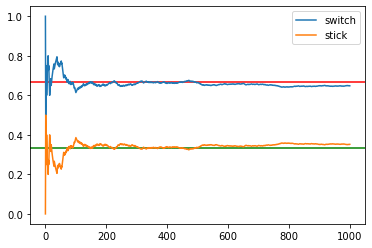

In [6]:
monte_carlo(1000)

## Casinò roulette simulation

In [7]:
# Ask the palyer for the color
choice = input('Do you bet on black or red numbers ?')
# If choice is black:
if choice == 'black':
    def win_lose():
        number = random.randint(0, 36)
        # Win
        if (number % 2) == 0 and number != 0:
            return True
        # Lose
        else:
            return False
# If choice is red
if choice == 'red':
    def win_lose():
        number = random.randint(0, 36)
        # WIn
        if (number % 2) != 0 and number != 0:
            return True
        # Lose
        else:
            return False


# PLay with a certain amount of money, betting the same quantity for x times
def play(total_money, bet_money, total_plays):
    # List to store how mucj money you have
    money = []
    # PLay x times, win if win_lose function equals True
    for play in range(total_plays):
        if win_lose():
            total_money += bet_money
            money.append(total_money)
        else:
            total_money -= bet_money
            money.append(total_money)
    plt.plot(money)
    final_money = money[-1]
    return final_money, money

Do you bet on black or red numbers ? black


1020

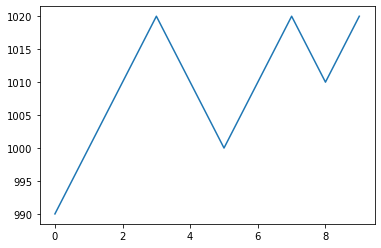

In [8]:
final_money, money = play(1000, 10, 10)
final_money

In [9]:
def monte_carlo(n):
    final_funds = []
    for i in range(n):
        f_money, h_money = play(1000, 10, 100)
        final_funds.append(f_money)
        plt.plot(h_money)
    wins = [m for m in final_funds if m > 1000]
    perc_wins = len(wins) / len(final_funds)
    return (sum(final_funds) / len(final_funds)), perc_wins

Average money the player leaves with: 965.4
Percentage of times the player leaves with more than he started: 0.35


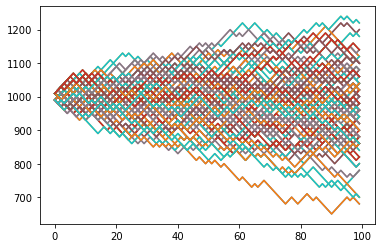

In [10]:
mean, perc_wins = monte_carlo(100)
print('Average money the player leaves with:', mean)
print('Percentage of times the player leaves with more than he started:', perc_wins)

## Estimating PI

To estimate the value of PI, we need the area of the square and the area of the circle. To find these areas, we will randomly place dots on the surface and count the dots that fall inside the circle and dots that fall inside the square. Such will give us an estimated amount of their areas. Therefore instead of using the actual areas, we will use the count of dots to use as areas.

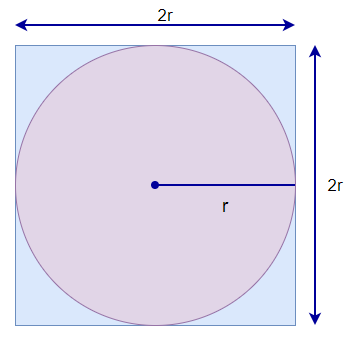 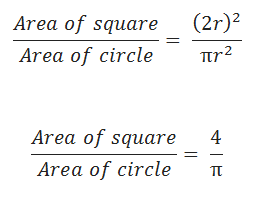 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import turtle

In [ ]:
pen = turtle.Turtle()
pen.hideturtle()
pen.speed(0)

# Draw the square
pen.up()
pen.setposition(-100, -100)
pen.down()
pen.fd(200)
pen.left(90)
pen.fd(200)

pen.left(90)
pen.fd(200)
pen.left(90)
pen.fd(200)
pen.left(90)

# Draw circle with radius 100
pen.up()
pen.setposition(0, -100)
pen.down()
pen.circle(100)

# Counters for points in and out of circle
in_circ = 0
out_circ = 0

pi_values = []

for i in range(5):
    for j in range(1000):
        x = random.randrange(-100, 100)
        y = random.randrange(-100, 100)
        # Check if number lies outside of the circle
        if (x**2 + y**2 > 100**2):
            pen.color('black')
            pen.up()
            pen.goto(x, y)
            pen.down()
            pen.dot()
            out_circ += 1
        else:
            pen.color('red')
            pen.up()
            pen.goto(x, y)
            pen.down()
            pen.dot()
            in_circ += 1
    
    # Calculate the value of pi using the number of points  in and out of the circle
    pi = 4.0 * in_circ / (in_circ + out_circ)
    pi_values.append(pi)
    
    avg_error = [abs(math.pi - pi) for pi in pi_values]
    print(pi_values[-1])
    
turtle.done()

3.116
3.18
3.148
3.151
3.1408
3.1366666666666667
3.141714285714286
3.1355
3.1417777777777776
3.1464
3.1392727272727274
3.139
3.132
3.140285714285714
3.138933333333333
3.13875
3.1378823529411766
3.138888888888889
3.1357894736842105
3.1388
3.14
3.1385454545454547
3.1438260869565218
3.1401666666666666
3.14624
3.1498461538461537
3.1502222222222223
3.1465714285714284
3.1463448275862067
3.146533333333333
3.1470967741935483
3.148375
3.1463030303030304
3.144823529411765
3.1441142857142856
3.143777777777778
3.14227027027027
3.1410526315789475
3.142974358974359
3.1454
3.1450731707317074
3.1458095238095236
3.144651162790698
3.1453636363636366
3.1446222222222224
3.1445217391304348
3.146382978723404
3.1456666666666666
3.145877551020408
3.14584
3.1455686274509804
3.1472307692307693
3.147547169811321
3.1476296296296296
3.148218181818182
3.148142857142857
3.148982456140351
3.1502068965517243
3.1511186440677967
3.1513333333333335
3.1504918032786886
3.150451612903226
3.150857142857143
3.1508125
3.151753

In [3]:
# Counters for points in and out of circle
in_circ = 0
out_circ = 0

pi_values = []

for i in range(5000):
    for j in range(1000):
        x = random.randrange(-100, 100)
        y = random.randrange(-100, 100)
        # Check if number lies outside of the circle
        if (x**2 + y**2 > 100**2):
            out_circ += 1
        else:
            in_circ += 1
    
    # Calculate the value of pi using the number of points  in and out of the circle
    pi = 4.0 * in_circ / (in_circ + out_circ)
    pi_values.append(pi)
    
    avg_error = [abs(math.pi - pi) for pi in pi_values]

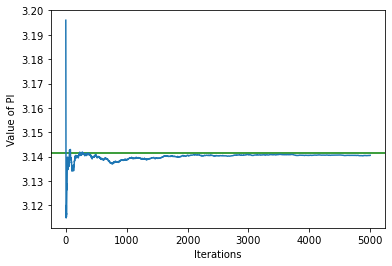

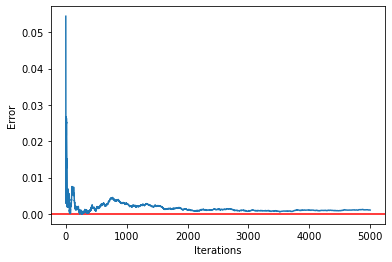

In [4]:
plt.axhline(y=math.pi, color='g')
plt.plot(pi_values)
plt.xlabel('Iterations')
plt.ylabel('Value of PI')
plt.show()

plt.axhline(y=0, color='r')
plt.plot(avg_error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()